In [ ]:
from google.colab import drive
drive.mount("/content/drive")

Mounted at /content/drive


In [ ]:
%cd "drive/MyDrive/22_FALL_KRISS_BIWEEKLY/Semester Project/Final_Project"
%ls

/content/drive/.shortcut-targets-by-id/1MiJnxdAeolOHLNBFqdT1GWlaif-x46Mo/22_FALL_KRISS_BIWEEKLY/Semester Project/Final_Project
'60 40 Wt Port.ipynb'
'Copy of Multi-Asset Portfolio Final.ipynb'
 CPIAUCNS.csv
'CPI_S&P.ipynb'
 df1_monthly.csv
'DF Data.csv'
'DF Equal Weight.csv'
'DF Inflation Beta.csv'
'DF SixFour Weight.csv'
'DF VolWt.csv'
 EqWeight.ipynb
'Excel Files'/
 filtered_df1.csv
 InflationBeta.ipynb
 Inflationolsregression.ipynb
'Inflation OLS Regression.ipynb'
 Inflation_VolWt.ipynb
 methodology-sp-multi-asset-dynamic-inflation-strategy-index.gdoc
 methodology-sp-multi-asset-dynamic-inflation-strategy-index.pdf
'Multi-Asset Portfolio Final.ipynb'
 research-a-dynamic-multi-asset-approach-to-inflation-hedging.gdoc
 research-a-dynamic-multi-asset-approach-to-inflation-hedging.pdf
'S&P500 Features Data.csv'
'SP Composite 1500.csv'
'SP GSCI Copper.csv'
'SP GSCI Crude Oil.csv'
'SP GSCI.csv'
'SP GSCI Gold.csv'
'SP United States REIT.csv'
'SP U.S. Aggregate Bond Index.csv'
'SP U.S. TIPS

In [ ]:
# import pandas lib as pd
import pandas as pd
import numpy as np
import datetime as dt
from statsmodels.regression.rolling import RollingOLS
from statsmodels.datasets import longley
import statsmodels.api as sm
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from datetime import datetime, timedelta

%matplotlib inline
plt.style.use('seaborn')

In [ ]:
# read by default 1st sheet of an excel file
SP1500 = pd.read_csv('SP Composite 1500.csv')
SPCopper = pd.read_csv('SP GSCI Copper.csv')
SPOil = pd.read_csv('SP GSCI Crude Oil.csv')
SPGold = pd.read_csv('SP GSCI Gold.csv')
SPGSCI = pd.read_csv('SP GSCI.csv')
SPBonds = pd.read_csv('SP U.S. Aggregate Bond Index.csv')
SPTips = pd.read_csv('SP U.S. TIPS Index.csv')
SPReit = pd.read_csv('SP United States REIT.csv')
CPI = pd.read_csv('CPIAUCNS.csv')

In [ ]:
CPI.head()

,Date,CPI
0,2012-10-01,231.317
1,2012-11-01,230.221
2,2012-12-01,229.601
3,2013-01-01,230.280
4,2013-02-01,232.166


In [ ]:
data = [SP1500, SPCopper, SPOil, SPGold, SPGSCI, SPBonds, SPTips, SPReit]

In [ ]:
for df in data:
    df.set_index('Date', inplace = True)
    df.drop(df.tail(1).index,inplace=True)
    df.index=pd.to_datetime(df.index)
    df.dropna(inplace = True)

In [ ]:
CPI.head(2)

,Date,CPI
0,2012-10-01,231.317
1,2012-11-01,230.221


In [ ]:
type(CPI['Date'])

pandas.core.series.Series

In [ ]:
CPI['Date'] = pd.to_datetime(CPI['Date'])
type(CPI['Date'])

pandas.core.series.Series

In [ ]:
CPI['Date'] = CPI['Date'].apply(lambda x: x.strftime('%Y-%m'))
CPI.set_index('Date', inplace = True)
CPI_pct = CPI.pct_change()
CPI_pct *= 100
CPI_pct.head(3)

,CPI
Date,
2012-10,NaN
2012-11,-0.473809
2012-12,-0.269306


In [ ]:
result = pd.concat([SP1500, SPCopper, SPOil, SPGold, SPGSCI, SPBonds, SPTips, SPReit], axis=1)
result.head(3)

,S&P Composite 1500,S&P GSCI Copper,S&P GSCI Crude Oil,S&P GSCI Gold,S&P GSCI,S&P U.S. Aggregate Bond Index,S&P U.S. TIPS Index (USD),S&P United States REIT (USD)
Date,,,,,,,,
2012-10-31,325.40,550.02,472.65,1000.87,637.74,176.06,217.48,240.20
2012-11-01,329.30,554.75,477.31,998.78,638.86,175.87,217.35,241.00
2012-11-02,325.99,543.32,465.09,975.31,626.07,175.85,217.07,242.56


In [ ]:
tickers = ['S&P Composite 1500','S&P GSCI Copper','S&P GSCI Crude Oil', 'S&P GSCI Gold','S&P GSCI','S&P U.S. Aggregate Bond Index', \
           'S&P U.S. TIPS Index (USD)','S&P United States REIT (USD)']
for ticker in tickers:
    result[ticker] = result[ticker].pct_change()

In [ ]:
# Group by Month
result = result.groupby(pd.Grouper(freq='M')).sum().reset_index()
result.head(3)

,Date,S&P Composite 1500,S&P GSCI Copper,S&P GSCI Crude Oil,S&P GSCI Gold,S&P GSCI,S&P U.S. Aggregate Bond Index,S&P U.S. TIPS Index (USD),S&P United States REIT (USD)
0,2012-10-31,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
1,2012-11-30,0.005393,0.030331,0.034118,-0.002800,0.020405,0.001494,0.004569,-0.005363
2,2012-12-31,0.009458,-0.007610,0.033362,-0.021204,-0.004950,-0.001232,-0.005132,0.031802


In [ ]:
result['Date'] = result['Date'].apply(lambda x: x.strftime('%Y-%m'))
result.set_index('Date', inplace = True)
result.head(3)

,S&P Composite 1500,S&P GSCI Copper,S&P GSCI Crude Oil,S&P GSCI Gold,S&P GSCI,S&P U.S. Aggregate Bond Index,S&P U.S. TIPS Index (USD),S&P United States REIT (USD)
Date,,,,,,,,
2012-10,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
2012-11,0.005393,0.030331,0.034118,-0.002800,0.020405,0.001494,0.004569,-0.005363
2012-12,0.009458,-0.007610,0.033362,-0.021204,-0.004950,-0.001232,-0.005132,0.031802


In [ ]:
result = result.iloc[1:, :]
result.head(2)

,S&P Composite 1500,S&P GSCI Copper,S&P GSCI Crude Oil,S&P GSCI Gold,S&P GSCI,S&P U.S. Aggregate Bond Index,S&P U.S. TIPS Index (USD),S&P United States REIT (USD)
Date,,,,,,,,
2012-11,0.005393,0.030331,0.034118,-0.002800,0.020405,0.001494,0.004569,-0.005363
2012-12,0.009458,-0.007610,0.033362,-0.021204,-0.004950,-0.001232,-0.005132,0.031802


In [ ]:
CPI_pct.head(2)

,CPI
Date,
2012-10,NaN
2012-11,-0.473809


In [ ]:
CPI_pct.head(3)

,CPI
Date,
2012-10,NaN
2012-11,-0.473809
2012-12,-0.269306


In [ ]:
final_result = pd.concat([result, CPI_pct['CPI']], axis=1) 
final_result = final_result.iloc[1:, :]
final_result.head()

,S&P Composite 1500,S&P GSCI Copper,S&P GSCI Crude Oil,S&P GSCI Gold,S&P GSCI,S&P U.S. Aggregate Bond Index,S&P U.S. TIPS Index (USD),S&P United States REIT (USD),CPI
Date,,,,,,,,,
2012-12,0.009458,-0.007610,0.033362,-0.021204,-0.004950,-0.001232,-0.005132,0.031802,-0.269306
2013-01,0.051520,0.029344,0.060549,-0.007569,0.043848,-0.005389,-0.007649,0.034616,0.295730
2013-02,0.011497,-0.043285,-0.056413,-0.051071,-0.040709,0.004699,0.002616,0.010951,0.819003
2013-03,0.036598,-0.034836,0.055649,0.011267,0.010851,0.001038,0.003078,0.024631,0.261451
2013-04,0.017014,-0.063636,-0.036979,-0.073665,-0.046654,0.008555,0.006836,0.064332,-0.103964


In [ ]:
final_result.shape

(121, 9)

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/tsatools.py:142: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/tsatools.py:142: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/tsatools.py:142: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/tsatools.py:142: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/tsatools.py:142: FutureWarning: In a future versi

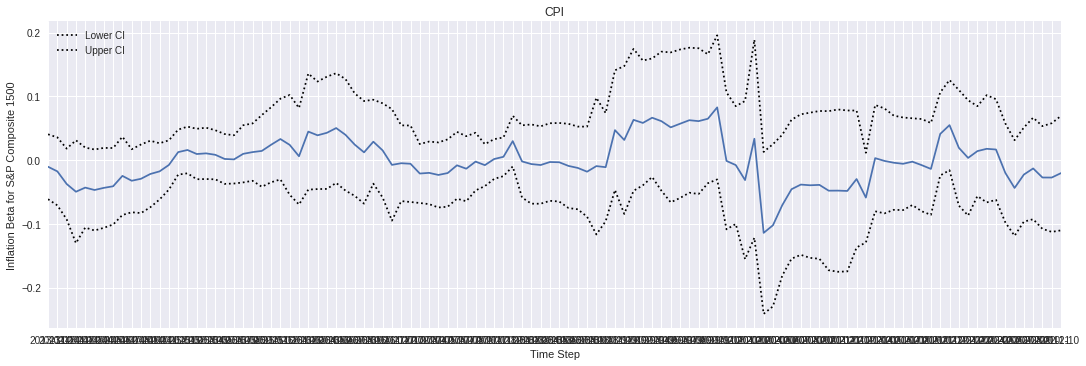

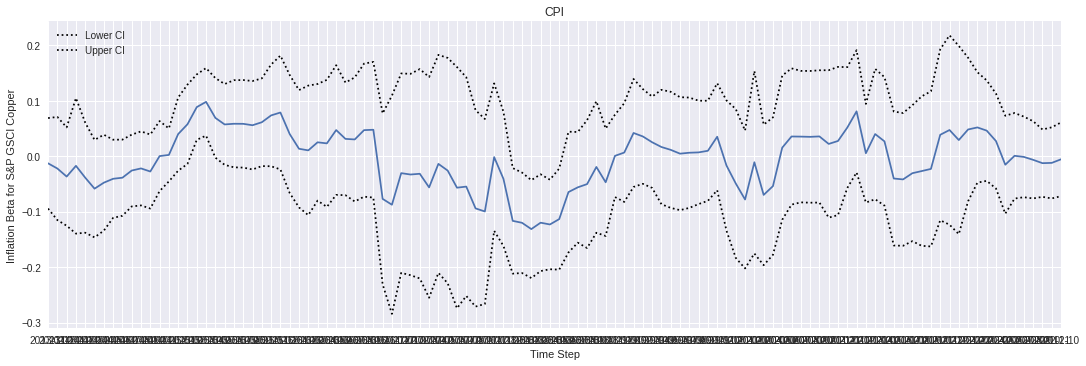

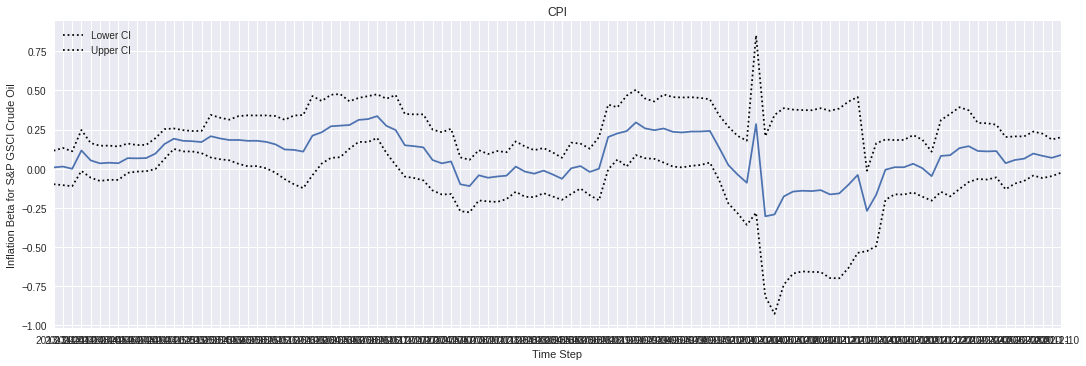

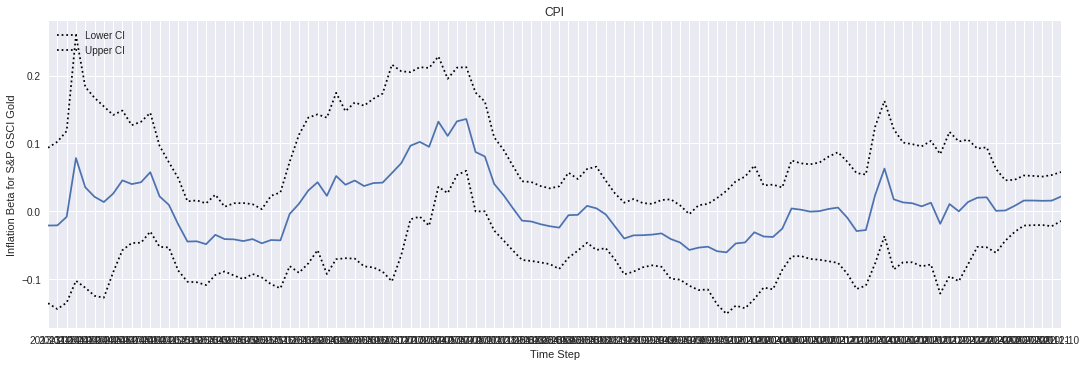

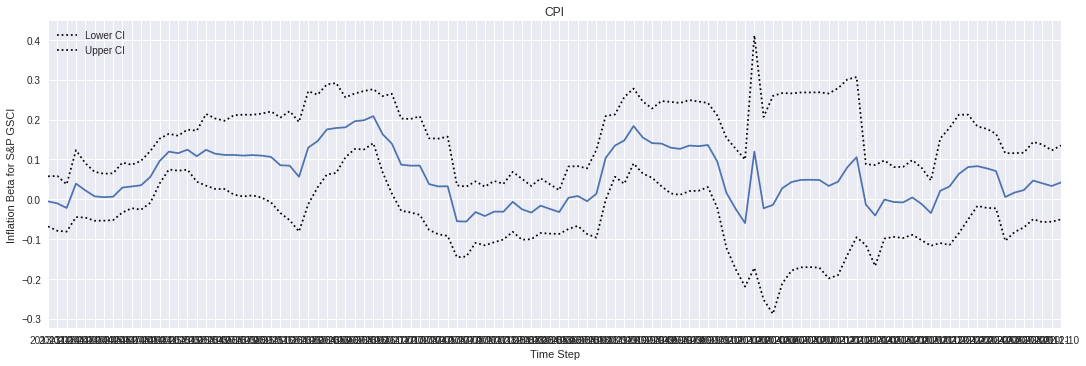

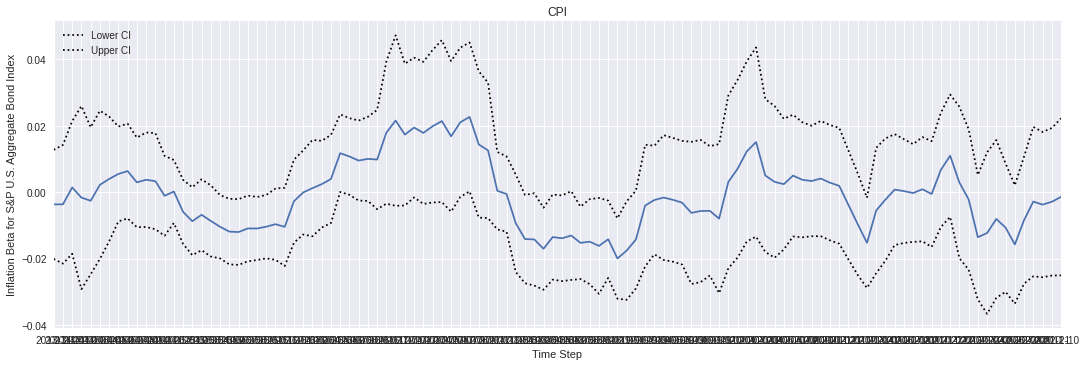

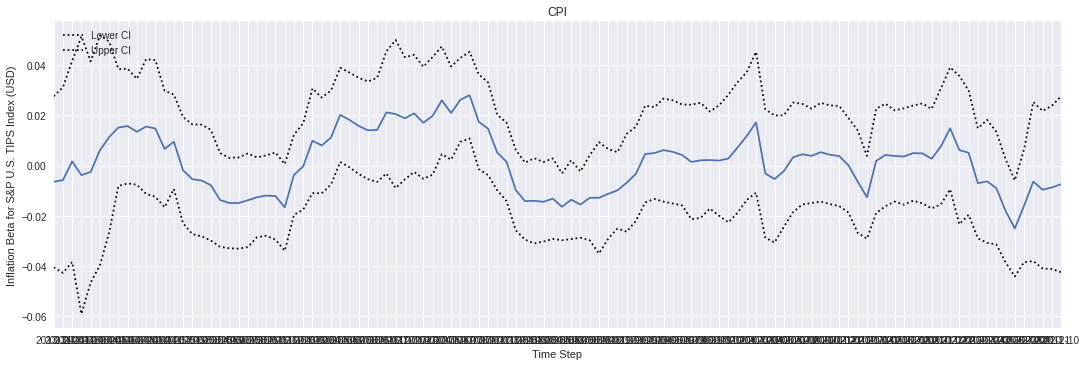

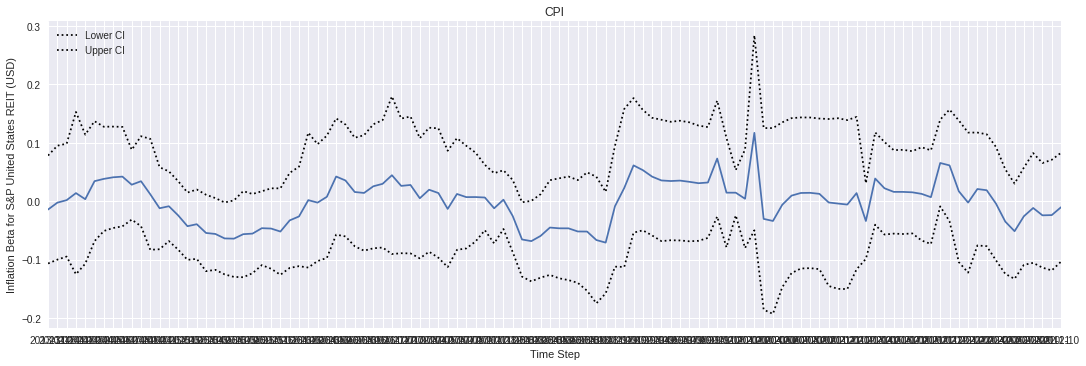

In [ ]:
endo_vars = ['S&P Composite 1500','S&P GSCI Copper','S&P GSCI Crude Oil',
             'S&P GSCI Gold','S&P GSCI','S&P U.S. Aggregate Bond Index',
             'S&P U.S. TIPS Index (USD)','S&P United States REIT (USD)' ]

params = pd.DataFrame()

for item in endo_vars:
    exog = sm.add_constant(final_result['CPI'])
    endo = final_result[item]
    model = RollingOLS(endo, exog, window = 12)
    rolling_res = model.fit()
    rolling_res.params.rename(columns={'CPI': item},inplace=True)
    params = pd.concat([params,rolling_res.params], axis=1)
    fig = rolling_res.plot_recursive_coefficient(variables='CPI', figsize=(15,5))
    plt.xlabel('Time Step')
    plt.ylabel('Inflation Beta for ' + item)
    plt.show
    

In [ ]:
column_names = list(params.columns.values)
column_names

['const',
 'S&P Composite 1500',
 'const',
 'S&P GSCI Copper',
 'const',
 'S&P GSCI Crude Oil',
 'const',
 'S&P GSCI Gold',
 'const',
 'S&P GSCI',
 'const',
 'S&P U.S. Aggregate Bond Index',
 'const',
 'S&P U.S. TIPS Index (USD)',
 'const',
 'S&P United States REIT (USD)']

In [ ]:
for item in endo_vars:
    params[item] = [(1 + t) if t >= 0 else 1/(1-t) for t in params[item]]
    
params.tail(3)

,const,S&P Composite 1500,const,S&P GSCI Copper,const,S&P GSCI Crude Oil,const,S&P GSCI Gold,const,S&P GSCI,const,S&P U.S. Aggregate Bond Index,const,S&P U.S. TIPS Index (USD),const,S&P United States REIT (USD)
Date,,,,,,,,,,,,,,,,
2022-10,0.005116,0.973322,-0.010057,0.987550,-0.038253,1.081968,-0.015708,1.015427,-0.014107,1.039712,-0.010571,0.996259,-0.002589,0.990517,-0.002498,0.976319
2022-11,0.005246,0.973268,-0.011208,0.988049,-0.010297,1.069553,-0.016331,1.015704,0.001073,1.032971,-0.012505,0.997112,-0.004657,0.991419,-0.003426,0.976712
2012-10,-0.004175,0.979925,-0.019947,0.994411,-0.034431,1.087435,-0.024461,1.021727,-0.011211,1.042072,-0.014501,0.998584,-0.006368,0.992666,-0.021624,0.989746


In [ ]:
params["Aggregated Beta"] = params.sum(axis=1)
params.tail(3)

,const,S&P Composite 1500,const,S&P GSCI Copper,const,S&P GSCI Crude Oil,const,S&P GSCI Gold,const,S&P GSCI,const,S&P U.S. Aggregate Bond Index,const,S&P U.S. TIPS Index (USD),const,S&P United States REIT (USD),Aggregated Beta
Date,,,,,,,,,,,,,,,,,
2022-10,0.005116,0.973322,-0.010057,0.987550,-0.038253,1.081968,-0.015708,1.015427,-0.014107,1.039712,-0.010571,0.996259,-0.002589,0.990517,-0.002498,0.976319,7.972407
2022-11,0.005246,0.973268,-0.011208,0.988049,-0.010297,1.069553,-0.016331,1.015704,0.001073,1.032971,-0.012505,0.997112,-0.004657,0.991419,-0.003426,0.976712,7.992682
2012-10,-0.004175,0.979925,-0.019947,0.994411,-0.034431,1.087435,-0.024461,1.021727,-0.011211,1.042072,-0.014501,0.998584,-0.006368,0.992666,-0.021624,0.989746,7.969848


In [ ]:
for item in endo_vars:
    params[item] = params[item].div(params["Aggregated Beta"].values)
    
params.tail(3)

,const,S&P Composite 1500,const,S&P GSCI Copper,const,S&P GSCI Crude Oil,const,S&P GSCI Gold,const,S&P GSCI,const,S&P U.S. Aggregate Bond Index,const,S&P U.S. TIPS Index (USD),const,S&P United States REIT (USD),Aggregated Beta
Date,,,,,,,,,,,,,,,,,
2022-10,0.005116,0.122086,-0.010057,0.123871,-0.038253,0.135714,-0.015708,0.127368,-0.014107,0.130414,-0.010571,0.124963,-0.002589,0.124243,-0.002498,0.122462,7.972407
2022-11,0.005246,0.121770,-0.011208,0.123619,-0.010297,0.133817,-0.016331,0.127079,0.001073,0.129240,-0.012505,0.124753,-0.004657,0.124041,-0.003426,0.122201,7.992682
2012-10,-0.004175,0.122954,-0.019947,0.124772,-0.034431,0.136444,-0.024461,0.128199,-0.011211,0.130752,-0.014501,0.125295,-0.006368,0.124553,-0.021624,0.124186,7.969848


In [ ]:
final_result.drop(['CPI'], axis = 1, inplace=True)
params.drop(['Aggregated Beta'], axis = 1, inplace=True)
params.head(14)

,const,S&P Composite 1500,const,S&P GSCI Copper,const,S&P GSCI Crude Oil,const,S&P GSCI Gold,const,S&P GSCI,const,S&P U.S. Aggregate Bond Index,const,S&P U.S. TIPS Index (USD),const,S&P United States REIT (USD)
Date,,,,,,,,,,,,,,,,
2012-12,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2013-01,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2013-02,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2013-03,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2013-04,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2013-05,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2013-06,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2013-07,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2013-08,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [ ]:
paramsdf = params.drop(columns = 'const')
paramsdf = paramsdf.iloc[11:, :]
paramsdf.head(3)

,S&P Composite 1500,S&P GSCI Copper,S&P GSCI Crude Oil,S&P GSCI Gold,S&P GSCI,S&P U.S. Aggregate Bond Index,S&P U.S. TIPS Index (USD),S&P United States REIT (USD)
Date,,,,,,,,
2013-11,0.124835,0.124547,0.127172,0.123557,0.125454,0.125689,0.125349,0.124376
2013-12,0.123894,0.123358,0.127820,0.123528,0.124776,0.125641,0.125383,0.125780
2014-01,0.122155,0.122250,0.126677,0.125710,0.123993,0.126922,0.126957,0.126967


In [ ]:
import numpy as np
import matplotlib.pyplot as plt, matplotlib.cm as cm, matplotlib.font_manager as fm
%matplotlib inline


In [ ]:
def get_colors(cmap, n, start=0., stop=1., alpha=1., reverse=False):
    '''return n-length list of rgba colors from the passed colormap name and alpha,
       limit extent by start/stop values and reverse list order if flag is true'''
    colors = [cm.get_cmap(cmap)(x) for x in np.linspace(start, stop, n)]
    colors = [(r, g, b, alpha) for r, g, b, _ in colors]
    return list(reversed(colors)) if reverse else colors

In [ ]:
color_list = get_colors('jet', n=8, start=0.13, stop=0.93, alpha=1)

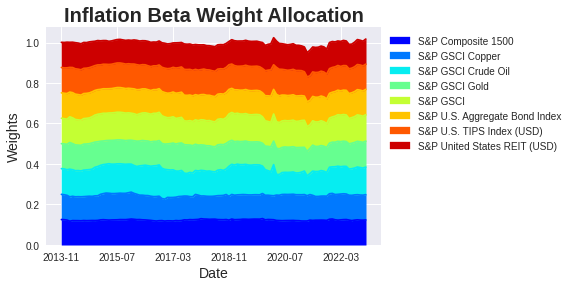

In [ ]:
paramsdf.plot.area(color=color_list)

# Basic stacked area chart.
plt.title("Inflation Beta Weight Allocation", fontsize = 20, weight = 'bold')
plt.xlabel("Date", fontsize = 14)
plt.ylabel("Weights", fontsize = 14)
plt.legend(bbox_to_anchor=(1, 1),loc='upper left')



In [ ]:
paramsdf.tail(3)

,S&P Composite 1500,S&P GSCI Copper,S&P GSCI Crude Oil,S&P GSCI Gold,S&P GSCI,S&P U.S. Aggregate Bond Index,S&P U.S. TIPS Index (USD),S&P United States REIT (USD)
Date,,,,,,,,
2022-10,0.122086,0.123871,0.135714,0.127368,0.130414,0.124963,0.124243,0.122462
2022-11,0.121770,0.123619,0.133817,0.127079,0.129240,0.124753,0.124041,0.122201
2012-10,0.122954,0.124772,0.136444,0.128199,0.130752,0.125295,0.124553,0.124186


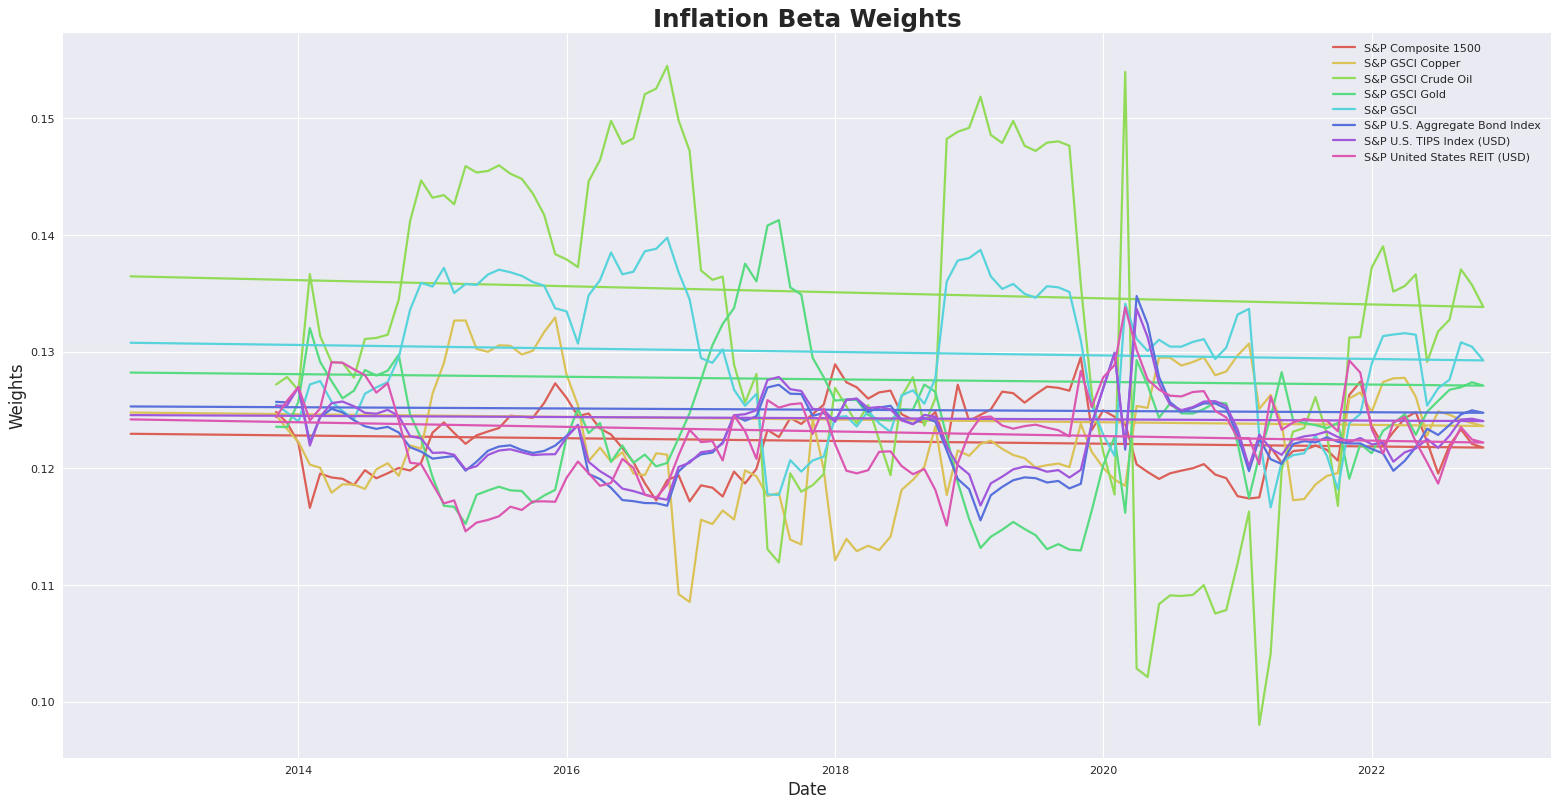

In [ ]:
# paramsdf.index = pd.to_datetime(paramsdf.index)

# plt.figure(figsize=(24, 12), dpi=80)

# vars = ['S&P Composite 1500','S&P GSCI Copper','S&P GSCI Crude Oil',
#              'S&P GSCI Gold','S&P GSCI','S&P U.S. Aggregate Bond Index',
#              'S&P U.S. TIPS Index (USD)','S&P United States REIT (USD)' ]

# palette = sns.color_palette("hls", 8)
# sns.set_palette(palette)
# sns.set_style('darkgrid')

# for i in vars:
#     plt.plot(paramsdf.index, paramsdf[i], label = i, linewidth = 2)

# #date_form = DateFormatter("%Y")
# #plt.gca().xaxis.set_major_formatter(date_form)

# plt.legend()
# plt.title("Inflation Beta Weights", fontsize = 22, weight = 'bold')
# plt.xlabel('Date', fontsize = 15)
# plt.ylabel('Weights', fontsize = 15)
# plt.show()

In [ ]:
final_result *= 100
final_result.dropna(inplace = True)
final_result.head()

,S&P Composite 1500,S&P GSCI Copper,S&P GSCI Crude Oil,S&P GSCI Gold,S&P GSCI,S&P U.S. Aggregate Bond Index,S&P U.S. TIPS Index (USD),S&P United States REIT (USD)
Date,,,,,,,,
2012-12,0.945836,-0.761000,3.336160,-2.120430,-0.495040,-0.123241,-0.513191,3.180230
2013-01,5.152027,2.934410,6.054883,-0.756875,4.384769,-0.538879,-0.764927,3.461645
2013-02,1.149651,-4.328523,-5.641346,-5.107124,-4.070926,0.469874,0.261607,1.095084
2013-03,3.659816,-3.483619,5.564867,1.126700,1.085099,0.103780,0.307769,2.463102
2013-04,1.701431,-6.363630,-3.697948,-7.366503,-4.665366,0.855482,0.683588,6.433200


In [ ]:
portfolioreturn = final_result.mul(params)
portfolioreturn

,S&P Composite 1500,S&P GSCI,S&P GSCI Copper,S&P GSCI Crude Oil,S&P GSCI Gold,S&P U.S. Aggregate Bond Index,S&P U.S. TIPS Index (USD),S&P United States REIT (USD),const,const,const,const,const,const,const,const
Date,,,,,,,,,,,,,,,,
2012-10,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2012-12,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2013-01,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2013-02,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2013-03,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2022-07,1.073389,-0.221896,-0.456064,-0.760651,-0.168586,0.252797,0.478436,1.019930,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2022-08,-0.502065,-0.466894,-0.122729,-1.169646,-0.394504,-0.290955,-0.293727,-0.744572,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2022-09,-1.180968,-1.152427,-0.295098,-1.524360,-0.393519,-0.492551,-0.745453,-1.645712,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [ ]:
portfolioreturn["InflaBeta"] = portfolioreturn.sum(axis=1)
portfolioreturn.tail(3)

,S&P Composite 1500,S&P GSCI,S&P GSCI Copper,S&P GSCI Crude Oil,S&P GSCI Gold,S&P U.S. Aggregate Bond Index,S&P U.S. TIPS Index (USD),S&P United States REIT (USD),const,const,const,const,const,const,const,const,InflaBeta
Date,,,,,,,,,,,,,,,,,
2022-09,-1.180968,-1.152427,-0.295098,-1.524360,-0.393519,-0.492551,-0.745453,-1.645712,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-7.430088
2022-10,1.004948,0.637210,-0.192607,1.237838,-0.227470,-0.145847,0.152633,0.616568,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3.083273
2022-11,0.408927,0.215478,1.602908,0.296559,1.074392,0.190500,0.073586,0.508317,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4.370668


In [ ]:
portfolioreturn['CumSum'] = portfolioreturn["InflaBeta"].cumsum()
portfolioreturn.tail(3)

,S&P Composite 1500,S&P GSCI,S&P GSCI Copper,S&P GSCI Crude Oil,S&P GSCI Gold,S&P U.S. Aggregate Bond Index,S&P U.S. TIPS Index (USD),S&P United States REIT (USD),const,const,const,const,const,const,const,const,InflaBeta,CumSum
Date,,,,,,,,,,,,,,,,,,
2022-09,-1.180968,-1.152427,-0.295098,-1.524360,-0.393519,-0.492551,-0.745453,-1.645712,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-7.430088,32.840617
2022-10,1.004948,0.637210,-0.192607,1.237838,-0.227470,-0.145847,0.152633,0.616568,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3.083273,35.923890
2022-11,0.408927,0.215478,1.602908,0.296559,1.074392,0.190500,0.073586,0.508317,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4.370668,40.294558


In [ ]:
# tickers = ['S&P Composite 1500','S&P GSCI Copper','S&P GSCI Crude Oil', 'S&P GSCI Gold','S&P GSCI','S&P U.S. Aggregate Bond Index', \
#            'S&P U.S. TIPS Index (USD)','S&P United States REIT (USD)']
# for ticker in tickers:
#     portfolioreturn[ticker] = portfolioreturn[ticker].cumsum()
# portfolioreturn.head(3)

In [ ]:
portfolioreturn = portfolioreturn.iloc[12:, :]

In [ ]:
portfolioreturn.index = pd.to_datetime(portfolioreturn.index)
type(portfolioreturn.index)

pandas.core.indexes.datetimes.DatetimeIndex

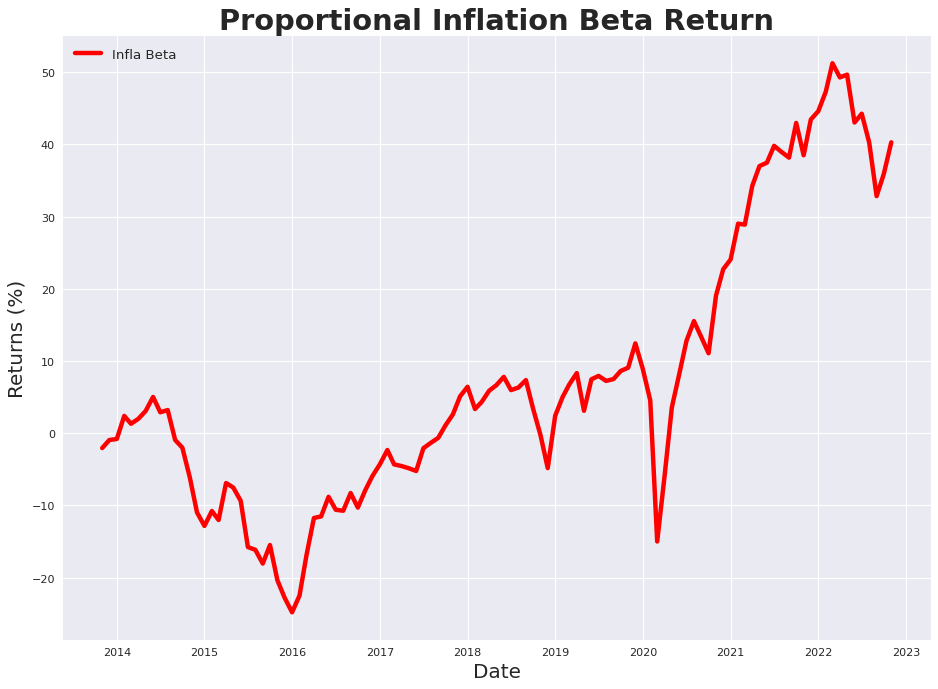

In [ ]:
from matplotlib.pyplot import figure
import matplotlib.dates as mdates
from matplotlib.dates import DateFormatter

figure(figsize=(14, 10), dpi=80)

palette = sns.color_palette("hls", 8)
sns.set_palette(palette)
sns.set_style('darkgrid')

plt.plot(portfolioreturn.index, portfolioreturn['CumSum'], label = 'Infla Beta', linewidth = 4, color = 'red')

vars = ['S&P Composite 1500', 'S&P GSCI Copper', 'S&P GSCI Crude Oil',
             'S&P GSCI Gold','S&P GSCI','S&P U.S. Aggregate Bond Index',
             'S&P U.S. TIPS Index (USD)','S&P United States REIT (USD)' ]
for i in vars:
    plt.plot(result.index, portfolioreturn[i], label = i, linewidth = 2)

date_form = DateFormatter("%Y")
plt.gca().xaxis.set_major_formatter(date_form)

plt.title("Proportional Inflation Beta Return", fontsize = 26, weight = 'bold')
plt.xlabel('Date', fontsize = 18)
plt.ylabel('Returns (%)', fontsize = 18)
plt.legend(fontsize = 12)
plt.show()

In [ ]:
# Export DF
#portfolioreturn.to_csv("DF Inflation Beta.csv")